# Ajuste de curvas (em construção)

Nas últimas aulas vimos como interpolar um polinômio por um conjunto de pontos $(x_0,y_0), \ldots, (x_n, y_n)$ usando a Interpolação de Lagrange e a Interpolação de Newton. **Interpolar** os pontos quer dizer que a função deve passar **exatamente** pelos pontos dados.

Implicitamente, estamos assumindo que:
* não existe um erro de medição nos pontos dados,
* o polinômio de grau $n$ é uma boa aproximação para a função no intervalo $[x_0,x_n]$.

Considere o exemplo abaixo onde as medições de $y$ sofrem flutuações aleatórias em $[-1.0,1.0]$. 

Text(0,0.5,'y')

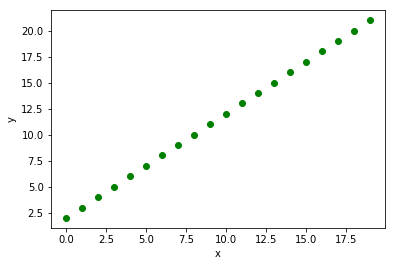

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

b = 2
a = 1

x = np.arange(20)
y = a*x + b

fig, ax = plt.subplots(1,1)
plt.plot(x,y,'go')
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

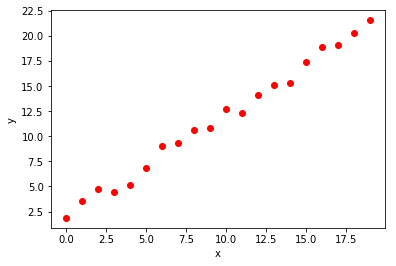

In [2]:
y_com_erro = y + (2*np.random.rand(len(x))-1)
plt.plot(x,y_com_erro,'ro')
plt.xlabel('x')
plt.ylabel('y')

/Users/fabricio/anaconda2/envs/py3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


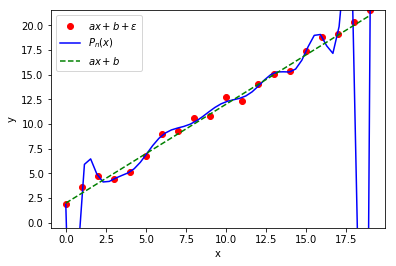

In [3]:
coef = np.polyfit(x,y_com_erro,deg=19)

xgrid = np.linspace(0,19)
p_x = np.polyval(coef,xgrid)
plt.plot(x,y_com_erro,'ro',label=r'$ax + b + \epsilon$')
plt.plot(xgrid,p_x,'b-',label=r'$P_n(x)$')
plt.plot(x,y,'g--',label=r'$ax + b$')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((-0.5,21.5))
plt.legend()

## Usando a regressão linear

In [12]:
n = len(x)
XtX = np.array([[n, x.sum()],[x.sum(), (x**2).sum()]])
XtY = np.array([[y_com_erro.sum()],[(x*y_com_erro).sum()]])
print(XtX)
print(XtY)

[[  20  190]
 [ 190 2470]]
[[ 232.89220268]
 [2884.44959156]]


In [10]:
beta = np.linalg.solve(XtX,XtY)
beta

array([2.04498633, 1.01048672])

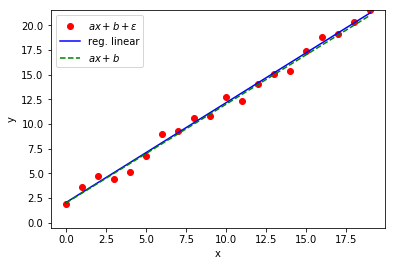

In [13]:
yhat = beta[0] + beta[1]*xgrid
plt.plot(x,y_com_erro,'ro',label=r'$ax + b + \epsilon$')
plt.plot(xgrid,yhat,'b-',label='reg. linear')
plt.plot(x,y,'g--',label=r'$ax + b$')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((-0.5,21.5))
plt.legend()